#Transfer Learning with **VGG16 Training**(False) and **data augmentation** (False)


1.   Epochs=50
2.   Learning rate=0.0005
1.   Image size=(200,200)
2.   Image=Grayscale
1.   Defect_classes=['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
1.   batch_size=16
1.   optimizer=adam





















# Importing the libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data organised in folders

# Folder path and location

In [2]:
#for desktop
path=r'./NEU Metal Surface Defects Data' 

In [3]:
# # accessing data from colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# # folder path for colab
# path=r'/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data'

# Contents and data organization within folder

In [5]:
print("Main Folder")
os.listdir(path)

Main Folder


['test', 'Thumbs.db', 'train', 'valid']

In [6]:
print("Train sub-folder")
os.listdir(path+'/train')

Train sub-folder


['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [7]:
classes_defects=os.listdir(path+'/train')
print(classes_defects)

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [8]:
print("files within sub-folder Patches")
os.listdir(path+'/train/Patches')[:3]

files within sub-folder Patches


['.ipynb_checkpoints', 'Pa_120.bmp', 'Pa_121.bmp']

In [9]:
len(os.listdir(path+'/train'))

6

# Image characteristics

In [10]:
img1=Image.open(path+'/train/Patches/Pa_206.bmp')
print(img1.filename)
print(img1.format)
print(img1.mode)
print(img1.size)

# # The "L" mode represents grayscale here.... So it can hold any of 256 shades of Gray 
# (includes black and white as Gray shades).
# # The "P" mode can hold 256 different colors like red,blue, green etc....
# https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=Examples%3A%208%20bit%20black%20and,are%20%22P%22%20mode..

./NEU Metal Surface Defects Data/train/Patches/Pa_206.bmp
BMP
L
(200, 200)


(200, 200)
max_pixel_value: 255


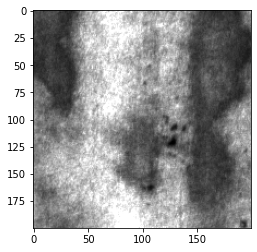

In [11]:
image=plt.imread(path+'/train/Patches/Pa_206.bmp')
print(image.shape)
plt.imshow(image,cmap='gray')
print("max_pixel_value: {}".format(image.max()))

# ImageDataGenerator and flow_from_directory for datasets

Sources:

1.   https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
2.   https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/TensorFlow/Basics/tutorial18-customdata-images/1_in_subfolders.py



In [12]:
data_generator=ImageDataGenerator(
    rescale=1.0/255,
    dtype=tf.float32
)

# Train dataloader

In [13]:
train_ds=data_generator.flow_from_directory(
    path+'/train',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=16
)

Found 1667 images belonging to 6 classes.


# Valid dataloader

In [14]:
valid_ds=data_generator.flow_from_directory(
    path+'/valid',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=16
)

Found 72 images belonging to 6 classes.


# Test dataloader

In [41]:
test_ds=data_generator.flow_from_directory(
    path+'/test',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=False,
    seed=1,
    batch_size=16
)

Found 72 images belonging to 6 classes.


# Dataloader sanity check

In [16]:
print("Dataloader_length(Images,labels)", len(train_ds[0]))
print("image list length",len(train_ds[0][0]))
print("image shape", train_ds[0][0].shape)
print("Defect List: ",classes_defects)
print("Defect dictionary in dataloader: ",train_ds.class_indices)
print(train_ds.labels[160])
print(train_ds.classes)
print(train_ds.class_indices.keys())
print(train_ds.class_indices.values())
#print([train_ds.class_indices(x)] for x in train_ds.classes])

Dataloader_length(Images,labels) 2
image list length 16
image shape (16, 200, 200, 3)
Defect List:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Defect dictionary in dataloader:  {'Crazing': 0, 'Inclusion': 1, 'Patches': 2, 'Pitted': 3, 'Rolled': 4, 'Scratches': 5}
0
[0 0 0 ... 5 5 5]
dict_keys(['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'])
dict_values([0, 1, 2, 3, 4, 5])


Image_shape:  (16, 200, 200, 3)
Label_value:  3.0
['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
tf.Tensor([3 0 5 3 0 3 0 5 4 2 0 3 4 3 0 1], shape=(16,), dtype=uint8)
Pitted


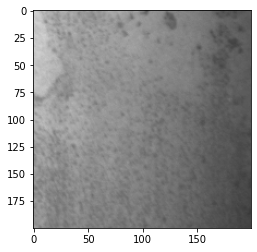

In [17]:
for images,labels in train_ds:
    plt.imshow(images[0],cmap='gray')
    print("Image_shape: ",images.shape)
    print("Label_value: ",labels[0])
    labels=tf.cast(labels,tf.uint8)
    print(classes_defects)
    print((labels))
    print(classes_defects[labels[0]])
    break

In [18]:
#

# Model architecture and Pretrained model import from keras

Sources:


1.   https://keras.io/api/applications/
2.   https://towardsdatascience.com/transfer-learning-for-image-classification-using-tensorflow-71c359b56673



In [19]:
from tensorflow.keras.applications import VGG16

In [20]:
feature_extractor=VGG16(weights='imagenet',input_shape=(200,200,3),include_top=False)
feature_extractor.trainable=False

In [21]:
input_=tf.keras.Input(shape=(200,200,3))
x=feature_extractor(input_,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [22]:
model=keras.Model(input_,output_)

# Final Model architecture summary

In [23]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [25]:
#pip install pydot

# Model training

In [26]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0005),
              metrics=['accuracy'])

In [27]:
history=model.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 24s 179ms/step - loss: 1.3533 - accuracy: 0.5873 - val_loss: 0.7661 - val_accuracy: 0.8750
Epoch 2/50
105/105 [==============================] - 14s 134ms/step - loss: 0.5714 - accuracy: 0.8878 - val_loss: 0.2682 - val_accuracy: 0.9861
Epoch 3/50
105/105 [==============================] - 14s 134ms/step - loss: 0.2677 - accuracy: 0.9382 - val_loss: 0.0934 - val_accuracy: 0.9861
Epoch 4/50
105/105 [==============================] - 14s 134ms/step - loss: 0.1634 - accuracy: 0.9652 - val_loss: 0.0763 - val_accuracy: 0.9861
Epoch 5/50
105/105 [==============================] - 14s 134ms/step - loss: 0.1277 - accuracy: 0.9634 - val_loss: 0.0465 - val_accuracy: 0.9861
Epoch 6/50
105/105 [==============================] - 14s 134ms/step - loss: 0.1122 - accuracy: 0.9712 - val_loss: 0.0430 - val_accuracy: 0.9861
Epoch 7/50
105/105 [==============================] - 14s 134ms/step - loss: 0.0950 - accuracy: 0.9676 - val_loss: 0.0471 - val_ac

# Test dataloader evaluation, Saving and loading weights

In [28]:
model.evaluate(test_ds)

5/5 [==============================] - 1s 118ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0016254002694040537, 1.0]

In [ ]:
#os.chdir('/content/drive/MyDrive/Colab Notebooks/Tlab')

In [ ]:
#For creating new directory
#os.makedirs('VGG16/VGG16_training_false_aug_false')

In [29]:
os.chdir('./VGG16/VGG16_training_false_aug_false')

In [30]:
#For saving weights
model.save_weights('training_vgg_01.ckpt')

## Loading weights

In [31]:
model_new=keras.Model(input_,output_)

In [32]:
model_new.load_weights('./training_vgg_01.ckpt')

In [33]:
model_new.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0005),
              metrics=['accuracy'],
              )

In [34]:
os.getcwd()

'D:\\Techlabs aachen\\VGG16_notebooks_and_weights\\VGG16\\VGG16_training_false_aug_false'

In [36]:
#2x
os.chdir(r'..')
print(os.getcwd())

D:\Techlabs aachen\VGG16_notebooks_and_weights


In [38]:
#test batch size=72
model_new.evaluate(test_ds)

1/1 [==============================] - 9s 9s/step - loss: 0.0016 - accuracy: 1.0000


[0.0016253952635452151, 1.0]

In [40]:
#test batch size=1
model_new.evaluate(test_ds)

72/72 [==============================] - 2s 16ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0016253986395895481, 1.0]

In [42]:
#test batch size=16
model_new.evaluate(test_ds)

5/5 [==============================] - 1s 118ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0016254002694040537, 1.0]

# Performance

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Loss vs epochs

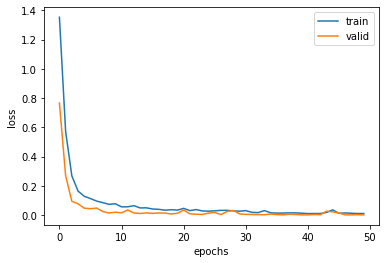

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

Accuracy vs epochs

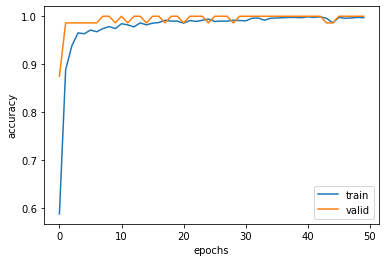

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
#plt.yscale()
plt.legend(['train','valid'])

# Predictions

In [46]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [47]:
X_test=[]
y_test=[]
for i in range(len(test_ds)):
    dataiter = iter(test_ds)
    images, labels = dataiter.next()
    X_test.extend(images)
    y_test.extend(labels)

In [48]:
print(len(X_test))

72


In [49]:
y_test=[int(x) for x in y_test]
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [50]:
y_predict=model_new.predict(np.array(X_test))
print(y_predict[:2])
y_hat=[np.argmax(x) for x in y_predict]
print(y_hat)

[[ 12.682918  -11.622034   -2.5998569  -1.4377866  -1.7692889 -18.764637 ]
 [ 11.765825  -12.625686   -1.74222    -2.6214345  -0.9131738 -19.148783 ]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [51]:
print(classification_report(y_test, y_hat, target_names=classes_defects))

              precision    recall  f1-score   support

     Crazing       1.00      1.00      1.00        12
   Inclusion       1.00      1.00      1.00        12
     Patches       1.00      1.00      1.00        12
      Pitted       1.00      1.00      1.00        12
      Rolled       1.00      1.00      1.00        12
   Scratches       1.00      1.00      1.00        12

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [52]:
print(confusion_matrix(y_test, y_hat))

[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


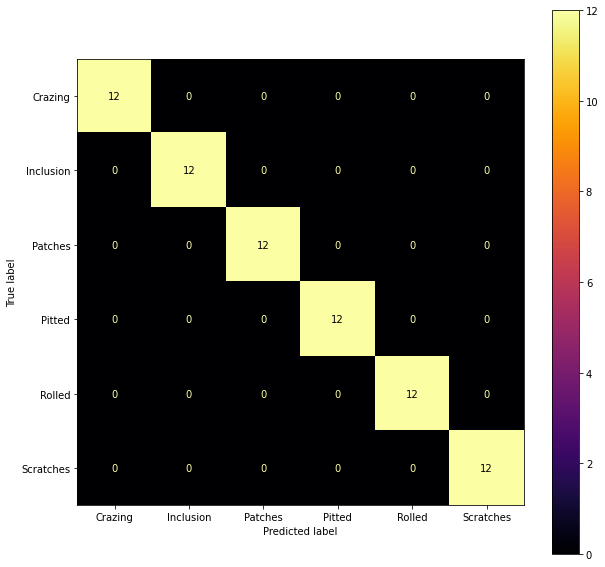

In [53]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat),display_labels=classes_defects)
fig,ax=plt.subplots(figsize=(10,10))
cmd.plot(ax=ax,cmap="inferno")

In [ ]:
# import numpy as np
# sample=np.expand_dims(X_test[0],axis=0)
# sample_predict=model.predict(sample)
# plt.imshow(X_test[0],cmap='gray')
# print(sample_predict, "Max: ", np.argmax(sample_predict))
# print("predicted label: ",classes_defects[np.argmax(sample_predict)])
# print("Actual label: ",classes_defects[int(y_test[0])])

In [ ]:
# sample = iter(test_ds)
# images, labels = sample.next()
# print(images.shape)
# sample_predict=model.predict(images)
# plt.imshow(images,cmap='gray')
# print(sample_predict, "Max: ", np.argmax(sample_predict))
# print("predicted label: ",classes_defects[np.argmax(sample_predict)])
# print("Actual label: ",classes_defects[int(labels)])